# Idiomatic Pandas
## 5 Tips for Better Pandas Code

## About Matt  Harrison @\_\_mharrison\_\_

* Author of Effective Pandas, Machine Learning Pocket Reference, and Illustrated Guide to Python 3.
* Advisor at Ponder (creators of Modin)
* Corporate trainer at MetaSnake. Taught Pandas to 1000's of students.
* Upcoming Live Course https://maven.com/matt-harrison/data-analysis-using-pandas

## Practice this on your data with your team!
* https://maven.com/matt-harrison/data-analysis-using-pandas
* Contact me matt@metasnake.com
* Follow on Twitter @\_\_mharrison\_\_

## Outline

* Load Data
* Types
* Chaining
* Mutation
* Apply
* Aggregation

## Data

In [1]:
%matplotlib inline
from IPython.display import display
import numpy as np
import pandas as pd

import io
import zipfile
#import modin.pandas as pd

In [ ]:
# https://gss.norc.org/get-the-data/stata
# takes a few minutes on my computer to load
#url ='https://github.com/mattharrison/datasets/blob/master/data/kaggle-survey-2018.zip?raw=true'
path = '/mnt/c/Users/matt/Downloads/GSS_stata.zip'
with zipfile.ZipFile(path) as z:
    print(z.namelist())
    gss = pd.read_stata(z.open('gss7221_r3.dta'))

In [ ]:
# https://gss.norc.org/get-the-data/stata
# takes a few minutes on my computer to load
#url ='https://github.com/mattharrison/datasets/blob/master/data/kaggle-survey-2018.zip?raw=true'
path = '/mnt/c/Users/matt/Downloads/gss_spss_with_codebook.zip'
with zipfile.ZipFile(path) as z:
    print(z.namelist())
    with open('gss.sav', mode='bw') as fout:
        fout.write(z.open('GSS7218_R3.sav').read())
    gss = pd.read_spss('gss.sav')

In [ ]:
!pip install pyreadstat

In [ ]:
%%time
import pyreadstat
gss, meta = pyreadstat.read_sav('gss.sav')

In [ ]:
gss.shape

In [ ]:
gss.to_feather('gss.fth')

In [3]:
%%time
raw = pd.read_feather('gss.fth')

CPU times: user 4.29 s, sys: 9.76 s, total: 14 s
Wall time: 2.09 s


In [4]:
raw

YEAR      ID  WRKSTAT  HRS1  HRS2  EVWORK    OCC  PRESTIGE  WRKSLF  \
0      1972.0     1.0      1.0   NaN   NaN     NaN  205.0      50.0     2.0   
1      1972.0     2.0      5.0   NaN   NaN     1.0  441.0      45.0     2.0   
2      1972.0     3.0      2.0   NaN   NaN     NaN  270.0      44.0     2.0   
3      1972.0     4.0      1.0   NaN   NaN     NaN    1.0      57.0     2.0   
4      1972.0     5.0      7.0   NaN   NaN     1.0  385.0      40.0     2.0   
...       ...     ...      ...   ...   ...     ...    ...       ...     ...   
64809  2018.0  2344.0      1.0  36.0   NaN     NaN    NaN       NaN     2.0   
64810  2018.0  2345.0      2.0  36.0   NaN     NaN    NaN       NaN     2.0   
64811  2018.0  2346.0      5.0   NaN   NaN     1.0    NaN       NaN     2.0   
64812  2018.0  2347.0      5.0   NaN   NaN     1.0    NaN       NaN     2.0   
64813  2018.0  2348.0      7.0   NaN   NaN     1.0    NaN       NaN     2.0   

       WRKGOVT  ...  NEISAFE  RLOOKS  RGROOMED  RWEIGHT  RHLTHEND      WTSS  \
0          NaN  ...      NaN     NaN       NaN      NaN       NaN  1.000000   
1          NaN  ...      NaN     NaN       NaN      NaN       NaN  1.000000   
2          NaN  ...      NaN     NaN       NaN      NaN       NaN  1.000000   
3          NaN  ...      NaN     NaN       NaN      NaN       NaN  1.000000   
4          NaN  ...      NaN     NaN       NaN      NaN       NaN  1.000000   
...        ...  ...      ...     ...       ...      ...       ...       ...   
64809      1.0  ...      1.0     NaN       NaN      NaN       NaN  0.471499   
64810      2.0  ...      1.0     3.0       3.0      2.0       1.0  0.942997   
64811      2.0  ...      1.0     4.0       4.0      3.0       NaN  0.942997   
64812      2.0  ...      1.0     3.0       3.0      2.0       2.0  0.942997   
64813      1.0  ...      1.0     3.0       4.0      3.0       NaN  0.471499   

         WTSSNR   WTSSALL  VSTRAT  VPSU  
0      1.000000  0.444600     NaN   NaN  
1      1.000000  0.889300     NaN   NaN  
2      1.000000  0.889300     NaN   NaN  
3      1.000000  0.889300     NaN   NaN  
4      1.000000  0.889300     NaN   NaN  
...         ...       ...     ...   ...  
64809  0.482425  0.471499  3378.0   2.0  
64810  0.964850  0.942997  3378.0   2.0  
64811  0.964850  0.942997  3378.0   2.0  
64812  0.964850  0.942997  3378.0   2.0  
64813  0.482425  0.471499  3378.0   2.0  

[64814 rows x 6110 columns]

In [5]:
raw.shape

(64814, 6110)

## My Cleanup
See GSS_Codebook.pdf for explanation

Columns:

* YEAR
* ID - RESPONDENT ID NUMBER
* AGE - AGE OF RESPONENT
* HRS1 - NUMBER OF HOURS WORKED LAST WEEK
* OCC - R'S CENSUS OCCUPATION CODE (1970) - Page 126 (VAR: OCC) see page 125 for notes APPENDIX F,G,H
   Appendix F - Page 3286
* MAJOR1 - COLLEGE MAJOR 1
* SEX - RESPONDENTS SEX
* RACE - RACE OF RESPONDENT
* BORN -  WAS R BORN IN THIS COUNTRY
* INCOME TOTAL FAMILY INCOME
* INCOME06 TOTAL FAMILY INCOME
* HONEST - HONEST
* TICKET - EVER RECEIVED A TRAFFIC TICKET


In [11]:
cols = ['YEAR','ID','AGE', 'HRS1','OCC','MAJOR1','SEX','RACE','BORN','INCOME',
        'INCOME06','HONEST','TICKET']

raw[cols].isna().mean()*100

YEAR         0.000000
ID           0.000000
AGE          0.351776
HRS1        42.132873
OCC         62.426328
MAJOR1      94.410158
SEX          0.000000
RACE         0.000000
BORN        14.291665
INCOME      12.845990
INCOME06    82.219891
HONEST      87.565958
TICKET      80.650785
dtype: float64

In [9]:
False + 41

41

In [13]:
MAJOR= '''RESPONSE PUNCH 1972-82 1982B 1983-87 1987B 1988-91 1993-98 2000-04 2006 2008 2010 2012 2014 2016 2018 ALL
Accounting/bookkeeping 1 0 0 0 0 0 0 0 0 0 0 28 32 30 29 119
Advertising 2 0 0 0 0 0 0 0 0 0 0 3 2 0 0 5
Agriculture/horticulture 3 0 0 0 0 0 0 0 0 0 0 8 2 7 5 22
Allied health 4 0 0 0 0 0 0 0 0 0 0 0 2 1 0 3
Anthropology 5 0 0 0 0 0 0 0 0 0 0 3 5 1 1 10
Architecture 6 0 0 0 0 0 0 0 0 0 0 2 3 5 3 13
Art 7 0 0 0 0 0 0 0 0 0 0 6 7 11 10 34
Biology 8 0 0 0 0 0 0 0 0 0 0 16 22 33 26 97
Business administration 9 0 0 0 0 0 0 0 0 0 0 90 142 172 138 542
Chemistry 11 0 0 0 0 0 0 0 0 0 0 5 8 10 4 27
Communications/speech 12 0 0 0 0 0 0 0 0 0 0 20 18 26 18 82
Comm. disorders 13 0 0 0 0 0 0 0 0 0 0 4 6 2 2 14
Computer science 14 0 0 0 0 0 0 0 0 0 0 25 24 33 17 99
Dentistry 15 0 0 0 0 0 0 0 0 0 0 2 4 3 5 14
Education 16 0 0 0 0 0 0 0 0 0 0 73 91 97 79 340
Economics 17 0 0 0 0 0 0 0 0 0 0 11 19 13 19 62
Engineering 18 0 0 0 0 0 0 0 0 0 0 47 49 47 54 197
English 19 0 0 0 0 0 0 0 0 0 0 23 26 27 24 100
Finance 20 0 0 0 0 0 0 0 0 0 0 7 15 14 16 52
Foreign language 21 0 0 0 0 0 0 0 0 0 0 4 8 6 5 23
Forestry 22 0 0 0 0 0 0 0 0 0 0 1 0 3 0 4
Geography 23 0 0 0 0 0 0 0 0 0 0 0 2 2 4 8
Geology 24 0 0 0 0 0 0 0 0 0 0 1 3 4 2 10
History 25 0 0 0 0 0 0 0 0 0 0 10 19 14 19 62
Home economics 26 0 0 0 0 0 0 0 0 0 0 0 0 3 2 5
Industry & techn 27 0 0 0 0 0 0 0 0 0 0 3 4 6 0 13
Journalism 28 0 0 0 0 0 0 0 0 0 0 5 6 6 4 21
Law 29 0 0 0 0 0 0 0 0 0 0 13 18 23 14 68
Law enforcement 30 0 0 0 0 0 0 0 0 0 0 3 5 4 2 14
Library science 31 0 0 0 0 0 0 0 0 0 0 4 5 2 3 14
Marketing 32 0 0 0 0 0 0 0 0 0 0 11 15 13 12 51
Mathematics 33 0 0 0 0 0 0 0 0 0 0 5 10 12 5 32
Medicine 34 0 0 0 0 0 0 0 0 0 0 9 25 12 11 57
Music 35 0 0 0 0 0 0 0 0 0 0 4 2 10 2 18
Nursing 36 0 0 0 0 0 0 0 0 0 0 36 39 60 51 186
Optometry 37 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Pharmacy 38 0 0 0 0 0 0 0 0 0 0 2 5 4 4 15
Philosophy 39 0 0 0 0 0 0 0 0 0 0 2 0 2 2 6
Physical education 40 0 0 0 0 0 0 0 0 0 0 9 6 16 6 37
Physics 41 0 0 0 0 0 0 0 0 0 0 3 6 7 4 20
Psychology 42 0 0 0 0 0 0 0 0 0 0 32 32 34 29 127
Political science/international relations 43 0 0 0 0 0 0 0 0 0 0 16 22 19 14 71
Sociology 44 0 0 0 0 0 0 0 0 0 0 9 15 10 12 46
Special education 45 0 0 0 0 0 0 0 0 0 0 5 3 5 2 15
Theater arts 46 0 0 0 0 0 0 0 0 0 0 6 2 3 1 12
Theology 47 0 0 0 0 0 0 0 0 0 0 6 6 13 8 33
Veterinary medicine 48 0 0 0 0 0 0 0 0 0 0 1 5 3 4 13
Liberal arts 49 0 0 0 0 0 0 0 0 0 0 8 16 12 10 46
Other 50 0 0 0 0 0 0 0 0 0 0 8 10 21 27 66
General sciences 51 0 0 0 0 0 0 0 0 0 0 10 13 15 14 52
Social work 52 0 0 0 0 0 0 0 0 0 0 7 17 24 7 55
General studies 53 0 0 0 0 0 0 0 0 0 0 2 5 7 7 21
Other vocational 54 0 0 0 0 0 0 0 0 0 0 5 11 6 5 27
Health 55 0 0 0 0 0 0 0 0 0 0 23 31 31 42 127
Industrial Relations 56 0 0 0 0 0 0 0 0 0 0 1 0 0 3 4
Child/Human/Family Development 57 0 0 0 0 0 0 0 0 0 0 11 3 7 7 28
Food Science/Nutrition/Culinary Arts 58 0 0 0 0 0 0 0 0 0 0 3 6 9 9 27
Environmental Science/Ecology 59 0 0 0 0 0 0 0 0 0 0 5 5 6 8 24
Social Sciences 60 0 0 0 0 0 0 0 0 0 0 4 2 7 5 18
Human Services/Human Resources 61 0 0 0 0 0 0 0 0 0 0 3 7 7 5 22
Visual Arts/Graphic Design/Design and Drafting 62 0 0 0 0 0 0 0 0 0 0 3 8 9 10 30
Fine Arts 63 0 0 0 0 0 0 0 0 0 0 4 5 5 6 20
Humanities 64 0 0 0 0 0 0 0 0 0 0 0 2 0 1 3
Ethnic studies 65 0 0 0 0 0 0 0 0 0 0 3 1 0 0 4
Educational administration 66 0 0 0 0 0 0 0 0 0 0 3 4 8 9 24
Television/Film 67 0 0 0 0 0 0 0 0 0 0 0 2 6 1 9
Aviation/Aeronatics 68 0 0 0 0 0 0 0 0 0 0 2 1 1 3 7
Statistics/Biostatistics 69 0 0 0 0 0 0 0 0 0 0 0 0 2 2 4
Criminology/Criminal Justice 70 0 0 0 0 0 0 0 0 0 0 13 17 17 13 60
Administrative Science/Public Administration 71 0 0 0 0 0 0 0 0 0 0 2 11 3 5 21
Electronics 72 0 0 0 0 0 0 0 0 0 0 6 6 5 9 26
Urban and Regional Planning 73 0 0 0 0 0 0 0 0 0 0 1 1 3 2 7
Mechanics/Machine Trade 74 0 0 0 0 0 0 0 0 0 0 0 1 1 4 6
Dance 75 0 0 0 0 0 0 0 0 0 0 1 0 1 1 3
Gerontology 76 0 0 0 0 0 0 0 0 0 0 1 0 1 1 3
Public Relations 77 0 0 0 0 0 0 0 0 0 0 3 1 2 1 7
Textiles/Cloth 78 0 0 0 0 0 0 0 0 0 0 3 4 0 0 7
Parks and Recreation 79 0 0 0 0 0 0 0 0 0 0 1 2 1 0 4
Information Technology 80 0 0 0 0 0 0 0 0 0 0 0 5 8 11 24
Fashion 81 0 0 0 0 0 0 0 0 0 0 0 0 3 1 4
Counseling 82 0 0 0 0 0 0 0 0 0 0 0 0 11 9 20
Don't know/UNCODED 98 0 0 0 0 0 0 0 0 0 0 2 3 0 0 5
No answer 99 0 0 0 0 0 0 0 0 0 0 0 1 5 3 9
Not applicable 0 13626 354 7542 353 5907 10334 8394 4510 2023 2044 1263 1597 1795 1435 61177'''

# copy paste slight tweak from page 186
major_dict = {int(row.split()[-16]): ' '.join(row.split()[:-16])  for row in MAJOR.split('\n')[1:]}
major_dict

{1: 'Accounting/bookkeeping',
 2: 'Advertising',
 3: 'Agriculture/horticulture',
 4: 'Allied health',
 5: 'Anthropology',
 6: 'Architecture',
 7: 'Art',
 8: 'Biology',
 9: 'Business administration',
 11: 'Chemistry',
 12: 'Communications/speech',
 13: 'Comm. disorders',
 14: 'Computer science',
 15: 'Dentistry',
 16: 'Education',
 17: 'Economics',
 18: 'Engineering',
 19: 'English',
 20: 'Finance',
 21: 'Foreign language',
 22: 'Forestry',
 23: 'Geography',
 24: 'Geology',
 25: 'History',
 26: 'Home economics',
 27: 'Industry & techn',
 28: 'Journalism',
 29: 'Law',
 30: 'Law enforcement',
 31: 'Library science',
 32: 'Marketing',
 33: 'Mathematics',
 34: 'Medicine',
 35: 'Music',
 36: 'Nursing',
 37: 'Optometry',
 38: 'Pharmacy',
 39: 'Philosophy',
 40: 'Physical education',
 41: 'Physics',
 42: 'Psychology',
 43: 'Political science/international relations',
 44: 'Sociology',
 45: 'Special education',
 46: 'Theater arts',
 47: 'Theology',
 48: 'Veterinary medicine',
 49: 'Liberal arts

In [14]:
(raw
 [cols]
 .assign(
     MAJOR1=lambda a_df:a_df.MAJOR1.fillna(99).astype(int).replace(major_dict),
     SEX=lambda a_df:a_df.SEX.astype(int).replace({1:'Male', 2:'Female'}),
     RACE=lambda a_df:a_df.RACE.astype(int).replace({1:'White', 2:'Black', 3:'Other'}),
     OCC=lambda a_df:a_df.OCC.fillna(9999).astype(int),
     BORN=lambda a_df:a_df.BORN.fillna(4).astype(int).replace({1:'Yes', 2:'No', 3:'Don\'t Know',
                                                    4:'No answer', 5:'Not applicable'}),
     INCOME=lambda a_df:a_df.INCOME.fillna(99).astype(int).replace({99:'No answer', **dict(enumerate(['Not applicable',
                                                                                  0,1000,3000,4000,5000,6000,
                                                                                  7000,8000,10000,15000,20000,25000,]))}),
     INCOME06=lambda a_df:a_df.INCOME06.fillna(26).astype(int).replace({26:'Refused', **dict(enumerate(['Not applicable',
                                                                                  0,1000,3000,4000,5000,6000,
                                                                                  7000,8000,10000,12500,15000,
                                                                                  17500,20000,22500,25000,30_000,
                                                                                  35_000, 40_000, 50_000, 60_000,
                                                                                 75_000, 90_000, 110_000, 130_000,
                                                                                 150_000]))}),
     HONEST=lambda a_df:a_df.HONEST.fillna(9).astype(int).replace({1:'Most desirable', 2:'3 most desireable',
                                                                   3:'Not mentioned', 4:  '3 least desireable',
                                                                   5: 'One least desireable',
                                                                    9:'No answer'}),
     TICKET=lambda a_df:a_df.TICKET.fillna(9).astype(int).replace({1:'Yes', 2:'No', 3:'Refused', 9: 'No answer'}),
 )
 .astype({'YEAR':int, 'ID': int})
 .to_csv('GSS.csv')
)

## Types
Getting the right types will enable analysis and correctness.


In [15]:
%%time
gss = pd.read_csv('GSS.csv', index_col=0)

CPU times: user 87.5 ms, sys: 0 ns, total: 87.5 ms
Wall time: 121 ms


In [16]:
gss.dtypes

YEAR          int64
ID            int64
AGE         float64
HRS1        float64
OCC           int64
MAJOR1       object
SEX          object
RACE         object
BORN         object
INCOME       object
INCOME06     object
HONEST       object
TICKET       object
dtype: object

In [17]:
gss

YEAR    ID   AGE  HRS1   OCC     MAJOR1     SEX   RACE       BORN  \
0      1972     1  23.0   NaN   205  No answer  Female  White  No answer   
1      1972     2  70.0   NaN   441  No answer    Male  White  No answer   
2      1972     3  48.0   NaN   270  No answer  Female  White  No answer   
3      1972     4  27.0   NaN     1  No answer  Female  White  No answer   
4      1972     5  61.0   NaN   385  No answer  Female  White  No answer   
...     ...   ...   ...   ...   ...        ...     ...    ...        ...   
64809  2018  2344  37.0  36.0  9999  No answer  Female  White        Yes   
64810  2018  2345  75.0  36.0  9999  No answer  Female  White        Yes   
64811  2018  2346  67.0   NaN  9999  No answer  Female  White        Yes   
64812  2018  2347  72.0   NaN  9999  No answer    Male  White        Yes   
64813  2018  2348  79.0   NaN  9999  No answer  Female  White        Yes   

          INCOME INCOME06     HONEST     TICKET  
0      No answer  Refused  No answer  No answer  
1      No answer  Refused  No answer  No answer  
2      No answer  Refused  No answer  No answer  
3      No answer  Refused  No answer  No answer  
4      No answer  Refused  No answer  No answer  
...          ...      ...        ...        ...  
64809  No answer  Refused  No answer  No answer  
64810      25000  Refused  No answer  No answer  
64811      25000  Refused  No answer  No answer  
64812      25000  Refused  No answer  No answer  
64813  No answer  Refused  No answer  No answer  

[64814 rows x 13 columns]

In [20]:
gss.memory_usage(deep=True)

Index        518512
YEAR         518512
ID           518512
AGE          518512
HRS1         518512
OCC          518512
MAJOR1      4298143
SEX         4026054
RACE        4018468
BORN        3939308
INCOME      4038832
INCOME06    4125036
HONEST      4323425
TICKET      4195986
dtype: int64

In [21]:
# 36 M
gss.memory_usage(deep=True).sum()

36076324

### Ints

In [22]:
gss.select_dtypes(int).describe()

YEAR            ID           OCC
count  64814.000000  64814.000000  64814.000000
mean    1994.939180   1151.810211   6418.583284
std       13.465368    828.030233   4618.278478
min     1972.000000      1.000000      1.000000
25%     1984.000000    507.000000    613.000000
50%     1996.000000   1029.500000   9999.000000
75%     2006.000000   1570.000000   9999.000000
max     2018.000000   4510.000000   9999.000000

In [25]:
# chaining
(gss
 .select_dtypes(int)
 .describe()
)

YEAR            ID           OCC
count  64814.000000  64814.000000  64814.000000
mean    1994.939180   1151.810211   6418.583284
std       13.465368    828.030233   4618.278478
min     1972.000000      1.000000      1.000000
25%     1984.000000    507.000000    613.000000
50%     1996.000000   1029.500000   9999.000000
75%     2006.000000   1570.000000   9999.000000
max     2018.000000   4510.000000   9999.000000

In [ ]:
# can comb08 be an int8?
# Do completion on int
np.iinfo(np.int)

In [26]:
np.iinfo(np.uint8)

iinfo(min=0, max=255, dtype=uint8)

In [27]:
np.iinfo(np.uint16)

iinfo(min=0, max=65535, dtype=uint16)

In [28]:
# chaining
(gss
 .astype({'YEAR': 'uint16', 'ID': 'uint16', 'OCC': 'uint16' })
 .select_dtypes([int, 'uint16'])
 .describe()
)

YEAR            ID           OCC
count  64814.000000  64814.000000  64814.000000
mean    1994.939180   1151.810211   6418.583284
std       13.465368    828.030233   4618.278478
min     1972.000000      1.000000      1.000000
25%     1984.000000    507.000000    613.000000
50%     1996.000000   1029.500000   9999.000000
75%     2006.000000   1570.000000   9999.000000
max     2018.000000   4510.000000   9999.000000

In [29]:
# chaining
# use 'integer' so see all int-like columns
(gss
 .astype({'YEAR': 'uint16', 'ID': 'uint16', 'OCC': 'uint16' })
 .select_dtypes(['integer'])  # see https://numpy.org/doc/stable/reference/arrays.scalars.html
 .describe()
)

YEAR            ID           OCC
count  64814.000000  64814.000000  64814.000000
mean    1994.939180   1151.810211   6418.583284
std       13.465368    828.030233   4618.278478
min     1972.000000      1.000000      1.000000
25%     1984.000000    507.000000    613.000000
50%     1996.000000   1029.500000   9999.000000
75%     2006.000000   1570.000000   9999.000000
max     2018.000000   4510.000000   9999.000000

In [30]:
# chaining
# use 'integer' so see all int-like columns
(gss
 .astype({'YEAR': 'uint16', 'ID': 'uint16', 'OCC': 'uint16' })
 #.select_dtypes(['integer'])  # see https://numpy.org/doc/stable/reference/arrays.scalars.html
 .memory_usage(deep=True)
 .sum()  # was 36M
)

34909672

### Floats

In [31]:
(gss
.select_dtypes('float'))

AGE  HRS1
0      23.0   NaN
1      70.0   NaN
2      48.0   NaN
3      27.0   NaN
4      61.0   NaN
...     ...   ...
64809  37.0  36.0
64810  75.0  36.0
64811  67.0   NaN
64812  72.0   NaN
64813  79.0   NaN

[64814 rows x 2 columns]

In [32]:
# surprise! age and hours worked looks int-like
gss.HRS1.describe()

count    37506.000000
mean        41.303711
std         14.171808
min          0.000000
25%         37.000000
50%         40.000000
75%         48.000000
max         89.000000
Name: HRS1, dtype: float64

In [33]:
# opps! missing values
gss.HRS1.value_counts(dropna=False)

NaN     27308
40.0    12866
50.0     2806
60.0     1981
45.0     1858
        ...  
0.0         7
81.0        3
79.0        3
71.0        3
87.0        3
Name: HRS1, Length: 91, dtype: int64

In [34]:
# where are they missing?
(gss
  .query('HRS1.isna()')
)

YEAR    ID   AGE  HRS1   OCC     MAJOR1     SEX   RACE       BORN  \
0      1972     1  23.0   NaN   205  No answer  Female  White  No answer   
1      1972     2  70.0   NaN   441  No answer    Male  White  No answer   
2      1972     3  48.0   NaN   270  No answer  Female  White  No answer   
3      1972     4  27.0   NaN     1  No answer  Female  White  No answer   
4      1972     5  61.0   NaN   385  No answer  Female  White  No answer   
...     ...   ...   ...   ...   ...        ...     ...    ...        ...   
64807  2018  2342  68.0   NaN  9999  No answer  Female  White        Yes   
64808  2018  2343  19.0   NaN  9999  No answer    Male  White        Yes   
64811  2018  2346  67.0   NaN  9999  No answer  Female  White        Yes   
64812  2018  2347  72.0   NaN  9999  No answer    Male  White        Yes   
64813  2018  2348  79.0   NaN  9999  No answer  Female  White        Yes   

          INCOME INCOME06     HONEST     TICKET  
0      No answer  Refused  No answer  No answer  
1      No answer  Refused  No answer  No answer  
2      No answer  Refused  No answer  No answer  
3      No answer  Refused  No answer  No answer  
4      No answer  Refused  No answer  No answer  
...          ...      ...        ...        ...  
64807       8000  Refused  No answer  No answer  
64808      15000  Refused  No answer  No answer  
64811      25000  Refused  No answer  No answer  
64812      25000  Refused  No answer  No answer  
64813  No answer  Refused  No answer  No answer  

[27308 rows x 13 columns]

In [35]:
# where are they missing?
(gss
  .query('AGE.isna()')
)

YEAR    ID  AGE  HRS1   OCC                   MAJOR1     SEX   RACE  \
228    1972   229  NaN   NaN   280                No answer    Male  White   
344    1972   345  NaN   NaN  9999                No answer  Female  Black   
1038   1972  1039  NaN   NaN   370                No answer  Female  White   
1427   1972  1428  NaN   NaN   902                No answer    Male  Black   
1553   1972  1554  NaN   NaN   395                No answer  Female  White   
...     ...   ...  ...   ...   ...                      ...     ...    ...   
63124  2018   659  NaN   NaN  9999                No answer  Female  Black   
63906  2018  1441  NaN  16.0  9999                No answer  Female  White   
63938  2018  1473  NaN  40.0  9999  Business administration    Male  Black   
64027  2018  1562  NaN  50.0  9999                No answer    Male  White   
64428  2018  1963  NaN  40.0  9999                    Other    Male  Other   

            BORN     INCOME INCOME06     HONEST     TICKET  
228    No answer  No answer  Refused  No answer  No answer  
344    No answer  No answer  Refused  No answer  No answer  
1038   No answer  No answer  Refused  No answer  No answer  
1427   No answer  No answer  Refused  No answer  No answer  
1553   No answer  No answer  Refused  No answer  No answer  
...          ...        ...      ...        ...        ...  
63124        Yes      25000  Refused  No answer  No answer  
63906        Yes      20000  Refused  No answer  No answer  
63938        Yes      25000  Refused  No answer  No answer  
64027        Yes      25000  Refused  No answer  No answer  
64428        Yes  No answer  Refused  No answer  No answer  

[228 rows x 13 columns]

In [36]:
# where are they missing?
# It turns out that ID is not consistent across years
(gss
  .query('ID == 229')
)

YEAR   ID   AGE  HRS1   OCC           MAJOR1     SEX   RACE       BORN  \
228    1972  229   NaN   NaN   280        No answer    Male  White  No answer   
1841   1973  229  47.0  40.0   394        No answer  Female  White  No answer   
3345   1974  229  38.0   NaN   602        No answer  Female  Other  No answer   
4829   1975  229  63.0  40.0   461        No answer    Male  White  No answer   
6319   1976  229  37.0  40.0   126        No answer  Female  White  No answer   
7818   1977  229  65.0   NaN   503        No answer    Male  White        Yes   
9348   1978  229  44.0  36.0   230        No answer  Female  White        Yes   
10880  1980  229  23.0   NaN   910        No answer  Female  White        Yes   
12348  1982  229  75.0   NaN   492        No answer    Male  White         No   
14208  1983  229  36.0  48.0   680        No answer    Male  White        Yes   
15807  1984  229  52.0  40.0   690        No answer  Female  White        Yes   
17280  1985  229  38.0   NaN   902        No answer  Female  Black        Yes   
18814  1986  229  32.0  89.0    65        No answer    Male  Other         No   
20284  1987  229  51.0  50.0   315        No answer    Male  White        Yes   
22103  1988  229  60.0  40.0    45        No answer    Male  White        Yes   
23584  1989  229  28.0   NaN     3        No answer    Male  White        Yes   
25121  1990  229  41.0  37.0   510        No answer    Male  Other        Yes   
26493  1991  229  21.0  15.0  9999        No answer  Female  Black        Yes   
28010  1993  229  50.0  40.0  9999        No answer    Male  White        Yes   
29616  1994  229  27.0  40.0  9999        No answer  Female  Black        Yes   
32608  1996  229  38.0  70.0  9999        No answer    Male  White        Yes   
35512  1998  229  36.0  89.0  9999        No answer    Male  White        Yes   
38344  2000  229  53.0  46.0  9999        No answer  Female  White        Yes   
41161  2002  229  82.0   NaN  9999        No answer  Female  White        Yes   
43926  2004  229  26.0   NaN  9999        No answer  Female  White        Yes   
46738  2006  229  25.0  40.0  9999        No answer    Male  Other         No   
51248  2008  229  70.0   NaN  9999        No answer  Female  White        Yes   
53271  2010  229  55.0  72.0  9999        No answer    Male  White         No   
55315  2012  229  48.0  40.0  9999        No answer  Female  White         No   
57289  2014  229  43.0  14.0  9999        No answer    Male  White        Yes   
59827  2016  229  33.0  40.0  9999  Television/Film  Female  White        Yes   
62694  2018  229  48.0   NaN  9999        No answer  Female  White        Yes   

          INCOME INCOME06          HONEST     TICKET  
228    No answer  Refused       No answer  No answer  
1841        8000  Refused   Not mentioned        Yes  
3345       20000  Refused       No answer         No  
4829       10000  Refused  Most desirable  No answer  
6319       20000  Refused  Most desirable         No  
7818        5000  Refused       No answer         No  
9348       25000  Refused  Most desirable  No answer  
10880      10000  Refused       No answer        Yes  
12348       6000  Refused       No answer        Yes  
14208      20000  Refused  Most desirable  No answer  
15807      25000  Refused       No answer         No  
17280       4000  Refused       No answer  No answer  
18814      20000  Refused       No answer  No answer  
20284      25000  Refused       No answer  No answer  
22103  No answer  Refused       No answer  No answer  
23584      25000  Refused       No answer  No answer  
25121      10000  Refused       No answer  No answer  
26493      10000  Refused       No answer  No answer  
28010      25000  Refused       No answer  No answer  
29616      20000  Refused       No answer  No answer  
32608      20000  Refused       No answer  No answer  
35512      25000  Refused       No answer  No answer  
38344      25000  Refused       No answer  No answer  
41161      25

In [37]:
# chaining
# use 'integer' so see all int-like columns
(gss
 .astype({'YEAR': 'uint16', 'ID': 'uint16', 'OCC': 'uint16' ,
         'HRS1': 'float16', 'AGE': 'float16'})
)

YEAR    ID   AGE  HRS1   OCC     MAJOR1     SEX   RACE       BORN  \
0      1972     1  23.0   NaN   205  No answer  Female  White  No answer   
1      1972     2  70.0   NaN   441  No answer    Male  White  No answer   
2      1972     3  48.0   NaN   270  No answer  Female  White  No answer   
3      1972     4  27.0   NaN     1  No answer  Female  White  No answer   
4      1972     5  61.0   NaN   385  No answer  Female  White  No answer   
...     ...   ...   ...   ...   ...        ...     ...    ...        ...   
64809  2018  2344  37.0  36.0  9999  No answer  Female  White        Yes   
64810  2018  2345  75.0  36.0  9999  No answer  Female  White        Yes   
64811  2018  2346  67.0   NaN  9999  No answer  Female  White        Yes   
64812  2018  2347  72.0   NaN  9999  No answer    Male  White        Yes   
64813  2018  2348  79.0   NaN  9999  No answer  Female  White        Yes   

          INCOME INCOME06     HONEST     TICKET  
0      No answer  Refused  No answer  No answer  
1      No answer  Refused  No answer  No answer  
2      No answer  Refused  No answer  No answer  
3      No answer  Refused  No answer  No answer  
4      No answer  Refused  No answer  No answer  
...          ...      ...        ...        ...  
64809  No answer  Refused  No answer  No answer  
64810      25000  Refused  No answer  No answer  
64811      25000  Refused  No answer  No answer  
64812      25000  Refused  No answer  No answer  
64813  No answer  Refused  No answer  No answer  

[64814 rows x 13 columns]

In [38]:
# chaining
# use 'integer' so see all int-like columns
(gss
 .astype({'YEAR': 'uint16', 'ID': 'uint16', 'OCC': 'uint16' ,
         'HRS1': 'float16', 'AGE': 'float16'})
 .memory_usage(deep=True)
 .sum()  # was 36M
)

34131904

In [39]:
# chaining
# use 'integer' so see all int-like columns
(gss
 .astype({'YEAR': 'uint16', 'ID': 'uint16', 'OCC': 'uint16' ,
         'HRS1': 'float16', 'AGE': 'float16'})
 .dtypes
)

YEAR         uint16
ID           uint16
AGE         float16
HRS1        float16
OCC          uint16
MAJOR1       object
SEX          object
RACE         object
BORN         object
INCOME       object
INCOME06     object
HONEST       object
TICKET       object
dtype: object

### Objects

In [40]:
(gss
 .select_dtypes(object)
)

MAJOR1     SEX   RACE       BORN     INCOME INCOME06     HONEST  \
0      No answer  Female  White  No answer  No answer  Refused  No answer   
1      No answer    Male  White  No answer  No answer  Refused  No answer   
2      No answer  Female  White  No answer  No answer  Refused  No answer   
3      No answer  Female  White  No answer  No answer  Refused  No answer   
4      No answer  Female  White  No answer  No answer  Refused  No answer   
...          ...     ...    ...        ...        ...      ...        ...   
64809  No answer  Female  White        Yes  No answer  Refused  No answer   
64810  No answer  Female  White        Yes      25000  Refused  No answer   
64811  No answer  Female  White        Yes      25000  Refused  No answer   
64812  No answer    Male  White        Yes      25000  Refused  No answer   
64813  No answer  Female  White        Yes  No answer  Refused  No answer   

          TICKET  
0      No answer  
1      No answer  
2      No answer  
3      No answer  
4      No answer  
...          ...  
64809  No answer  
64810  No answer  
64811  No answer  
64812  No answer  
64813  No answer  

[64814 rows x 8 columns]

In [41]:
# looks categorical
(gss.MAJOR1.value_counts(dropna=False))

No answer                  61191
Business administration      542
Education                    340
Engineering                  197
Nursing                      186
                           ...  
Ethnic studies                 4
Gerontology                    3
Humanities                     3
Allied health                  3
Dance                          3
Name: MAJOR1, Length: 81, dtype: int64

In [42]:
# wow!
(gss
 .astype({'YEAR': 'uint16', 'ID': 'uint16', 'OCC': 'uint16' ,
         'HRS1': 'float16', 'AGE': 'float16',
         'MAJOR1': 'category'})
 .memory_usage(deep=True)
 .sum()  # was 36M
)


29906506

In [43]:
(gss
 .select_dtypes(object)
 .columns
)

Index(['MAJOR1', 'SEX', 'RACE', 'BORN', 'INCOME', 'INCOME06', 'HONEST',
       'TICKET'],
      dtype='object')

In [44]:
# wow!
(gss
 .astype({'YEAR': 'uint16', 'ID': 'uint16', 'OCC': 'uint16' ,
         'HRS1': 'float16', 'AGE': 'float16',
         'MAJOR1': 'category',
          **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                'INCOME', 'INCOME06', 'HONEST','TICKET']}})
 .memory_usage(deep=True)
 .sum()  # was 36M now 1.6M
)


1698973

In [45]:
# a glorious function
def tweak_gss(gss):
    return (gss
     .astype({'YEAR': 'uint16', 'ID': 'uint16', 'OCC': 'uint16' ,
             'HRS1': 'float16', 'AGE': 'float16',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
    )

tweak_gss(gss)

YEAR    ID   AGE  HRS1   OCC     MAJOR1     SEX   RACE       BORN  \
0      1972     1  23.0   NaN   205  No answer  Female  White  No answer   
1      1972     2  70.0   NaN   441  No answer    Male  White  No answer   
2      1972     3  48.0   NaN   270  No answer  Female  White  No answer   
3      1972     4  27.0   NaN     1  No answer  Female  White  No answer   
4      1972     5  61.0   NaN   385  No answer  Female  White  No answer   
...     ...   ...   ...   ...   ...        ...     ...    ...        ...   
64809  2018  2344  37.0  36.0  9999  No answer  Female  White        Yes   
64810  2018  2345  75.0  36.0  9999  No answer  Female  White        Yes   
64811  2018  2346  67.0   NaN  9999  No answer  Female  White        Yes   
64812  2018  2347  72.0   NaN  9999  No answer    Male  White        Yes   
64813  2018  2348  79.0   NaN  9999  No answer  Female  White        Yes   

          INCOME INCOME06     HONEST     TICKET  
0      No answer  Refused  No answer  No answer  
1      No answer  Refused  No answer  No answer  
2      No answer  Refused  No answer  No answer  
3      No answer  Refused  No answer  No answer  
4      No answer  Refused  No answer  No answer  
...          ...      ...        ...        ...  
64809  No answer  Refused  No answer  No answer  
64810      25000  Refused  No answer  No answer  
64811      25000  Refused  No answer  No answer  
64812      25000  Refused  No answer  No answer  
64813  No answer  Refused  No answer  No answer  

[64814 rows x 13 columns]

## Fix Column Names

In [46]:
# a glorious function
def tweak_gss(gss):
    return (gss
     .astype({'YEAR': 'uint16', 'ID': 'uint16', 'OCC': 'uint16' ,
             'HRS1': 'float16', 'AGE': 'float16',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
                      'HRS1': 'hours_worked', 'OCC': 'occupation', 
                      'MAJOR1': 'college_major', 'SEX':'sex', 
                      'RACE':'race', 'BORN':'born_in_US',
                      'INCOME':'income_1970', 'INCOME06': 'income_2006',
                      'HONEST':'honesty_rankint',
                      'TICKET':'traffic_ticket'})
    )

tweak_gss(gss)

year  year_id   age  hours_worked  occupation college_major     sex  \
0      1972        1  23.0           NaN         205     No answer  Female   
1      1972        2  70.0           NaN         441     No answer    Male   
2      1972        3  48.0           NaN         270     No answer  Female   
3      1972        4  27.0           NaN           1     No answer  Female   
4      1972        5  61.0           NaN         385     No answer  Female   
...     ...      ...   ...           ...         ...           ...     ...   
64809  2018     2344  37.0          36.0        9999     No answer  Female   
64810  2018     2345  75.0          36.0        9999     No answer  Female   
64811  2018     2346  67.0           NaN        9999     No answer  Female   
64812  2018     2347  72.0           NaN        9999     No answer    Male   
64813  2018     2348  79.0           NaN        9999     No answer  Female   

        race born_in_US income_1970 income_2006 honesty_rankint traffic_ticket  
0      White  No answer   No answer     Refused       No answer      No answer  
1      White  No answer   No answer     Refused       No answer      No answer  
2      White  No answer   No answer     Refused       No answer      No answer  
3      White  No answer   No answer     Refused       No answer      No answer  
4      White  No answer   No answer     Refused       No answer      No answer  
...      ...        ...         ...         ...             ...            ...  
64809  White        Yes   No answer     Refused       No answer      No answer  
64810  White        Yes       25000     Refused       No answer      No answer  
64811  White        Yes       25000     Refused       No answer      No answer  
64812  White        Yes       25000     Refused       No answer      No answer  
64813  White        Yes   No answer     Refused       No answer      No answer  

[64814 rows x 13 columns]

## Chain

Chaining is also called "flow" programming. Rather than making intermediate variables, just leverage the fact that most operations return a new object and work on that.

The chain should read like a recipe of ordered steps.

(BTW, this is actually what we did above.)

<div class='alert alert-warning'>
    Hint: Leverage <tt>.pipe</tt> if you can't find a way to chain 😉🐼💪
</div>
    




In [ ]:
# a glorious function
def tweak_gss(gss):
    return (gss
     .astype({'YEAR': 'uint16', 'ID': 'uint16', 'OCC': 'uint16' ,
             'HRS1': 'float16', 'AGE': 'float16',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
    .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
                      'HRS1': 'hours_worked', 'OCC': 'occupation', 
                      'MAJOR1': 'college_major', 'SEX':'sex', 
                      'RACE':'race', 'BORN':'born_in_US',
                      'INCOME':'income_1970', 'INCOME06': 'income_2006',
                      'HONEST':'honesty_rankint',
                      'TICKET':'traffic_ticket'})            
    )

tweak_gss(gss)

In [ ]:
# compare chain to this mess
year = gss.YEAR
year_int = year.astype('uint16')
id = gss.ID
id_int = id.astype('uint16')
occ = gss.OCC
occ_int = occ.astype('uint16')

gss2 = gss.copy()
gss2['year'] = year_int
gss2['year_id'] = id_int
gss2['occupation'] = occ_int

# more of this

In [47]:
# easy to debug
#  - assign to var (df3)
#  - comment out
#  - pipe to display


from IPython.display import display

def get_var(df, var_name):
    globals()[var_name] = df
    return df

# a glorious function
def tweak_gss(gss):
    return (gss
      # create var                        
     .pipe(get_var, 'df3')
     .astype({'YEAR': 'uint16', 'ID': 'uint16', 'OCC': 'uint16' ,
             'HRS1': 'float16', 'AGE': 'float16',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .pipe(lambda df: display(df) or df)    
    .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
                      'HRS1': 'hours_worked', 'OCC': 'occupation', 
                      'MAJOR1': 'college_major', 'SEX':'sex', 
                      'RACE':'race', 'BORN':'born_in_US',
                      'INCOME':'income_1970', 'INCOME06': 'income_2006',
                      'HONEST':'honesty_rankint',
                      'TICKET':'traffic_ticket'})                        
    )

tweak_gss(gss)


YEAR    ID   AGE  HRS1   OCC     MAJOR1     SEX   RACE       BORN  \
0      1972     1  23.0   NaN   205  No answer  Female  White  No answer   
1      1972     2  70.0   NaN   441  No answer    Male  White  No answer   
2      1972     3  48.0   NaN   270  No answer  Female  White  No answer   
3      1972     4  27.0   NaN     1  No answer  Female  White  No answer   
4      1972     5  61.0   NaN   385  No answer  Female  White  No answer   
...     ...   ...   ...   ...   ...        ...     ...    ...        ...   
64809  2018  2344  37.0  36.0  9999  No answer  Female  White        Yes   
64810  2018  2345  75.0  36.0  9999  No answer  Female  White        Yes   
64811  2018  2346  67.0   NaN  9999  No answer  Female  White        Yes   
64812  2018  2347  72.0   NaN  9999  No answer    Male  White        Yes   
64813  2018  2348  79.0   NaN  9999  No answer  Female  White        Yes   

          INCOME INCOME06     HONEST     TICKET  
0      No answer  Refused  No answer  No answer  
1      No answer  Refused  No answer  No answer  
2      No answer  Refused  No answer  No answer  
3      No answer  Refused  No answer  No answer  
4      No answer  Refused  No answer  No answer  
...          ...      ...        ...        ...  
64809  No answer  Refused  No answer  No answer  
64810      25000  Refused  No answer  No answer  
64811      25000  Refused  No answer  No answer  
64812      25000  Refused  No answer  No answer  
64813  No answer  Refused  No answer  No answer  

[64814 rows x 13 columns]

year  year_id   age  hours_worked  occupation college_major     sex  \
0      1972        1  23.0           NaN         205     No answer  Female   
1      1972        2  70.0           NaN         441     No answer    Male   
2      1972        3  48.0           NaN         270     No answer  Female   
3      1972        4  27.0           NaN           1     No answer  Female   
4      1972        5  61.0           NaN         385     No answer  Female   
...     ...      ...   ...           ...         ...           ...     ...   
64809  2018     2344  37.0          36.0        9999     No answer  Female   
64810  2018     2345  75.0          36.0        9999     No answer  Female   
64811  2018     2346  67.0           NaN        9999     No answer  Female   
64812  2018     2347  72.0           NaN        9999     No answer    Male   
64813  2018     2348  79.0           NaN        9999     No answer  Female   

        race born_in_US income_1970 income_2006 honesty_rankint traffic_ticket  
0      White  No answer   No answer     Refused       No answer      No answer  
1      White  No answer   No answer     Refused       No answer      No answer  
2      White  No answer   No answer     Refused       No answer      No answer  
3      White  No answer   No answer     Refused       No answer      No answer  
4      White  No answer   No answer     Refused       No answer      No answer  
...      ...        ...         ...         ...             ...            ...  
64809  White        Yes   No answer     Refused       No answer      No answer  
64810  White        Yes       25000     Refused       No answer      No answer  
64811  White        Yes       25000     Refused       No answer      No answer  
64812  White        Yes       25000     Refused       No answer      No answer  
64813  White        Yes   No answer     Refused       No answer      No answer  

[64814 rows x 13 columns]

In [48]:
# inspect intermediate data frame
df3

YEAR    ID   AGE  HRS1   OCC     MAJOR1     SEX   RACE       BORN  \
0      1972     1  23.0   NaN   205  No answer  Female  White  No answer   
1      1972     2  70.0   NaN   441  No answer    Male  White  No answer   
2      1972     3  48.0   NaN   270  No answer  Female  White  No answer   
3      1972     4  27.0   NaN     1  No answer  Female  White  No answer   
4      1972     5  61.0   NaN   385  No answer  Female  White  No answer   
...     ...   ...   ...   ...   ...        ...     ...    ...        ...   
64809  2018  2344  37.0  36.0  9999  No answer  Female  White        Yes   
64810  2018  2345  75.0  36.0  9999  No answer  Female  White        Yes   
64811  2018  2346  67.0   NaN  9999  No answer  Female  White        Yes   
64812  2018  2347  72.0   NaN  9999  No answer    Male  White        Yes   
64813  2018  2348  79.0   NaN  9999  No answer  Female  White        Yes   

          INCOME INCOME06     HONEST     TICKET  
0      No answer  Refused  No answer  No answer  
1      No answer  Refused  No answer  No answer  
2      No answer  Refused  No answer  No answer  
3      No answer  Refused  No answer  No answer  
4      No answer  Refused  No answer  No answer  
...          ...      ...        ...        ...  
64809  No answer  Refused  No answer  No answer  
64810      25000  Refused  No answer  No answer  
64811      25000  Refused  No answer  No answer  
64812      25000  Refused  No answer  No answer  
64813  No answer  Refused  No answer  No answer  

[64814 rows x 13 columns]

## Don't Mutate

> "you are missing the point, inplace rarely actually does something inplace, you are thinking that you are saving memory but you are not."
>
> **jreback** - Pandas core dev



https://github.com/pandas-dev/pandas/issues/16529#issuecomment-676518136

* In general, no performance benefits
* Prohibits chaining
* ``SettingWithCopyWarning`` fun


In [49]:
pd.read_csv??

## Don't Apply (if you can)

In [50]:
# a glorious function
def tweak_gss(gss):
    return (gss
     .astype({'YEAR': 'uint16', 'ID': 'uint16', 'OCC': 'uint16' ,
             'HRS1': 'float16', 'AGE': 'float16',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
    .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
                      'HRS1': 'hours_worked', 'OCC': 'occupation', 
                      'MAJOR1': 'college_major', 'SEX':'sex', 
                      'RACE':'race', 'BORN':'born_in_US',
                      'INCOME':'income_1970', 'INCOME06': 'income_2006',
                      'HONEST':'honesty_rankint',
                      'TICKET':'traffic_ticket'})                        
    )

gss2 = tweak_gss(gss)

In [51]:
# convert age to months
def to_months(val):
    return val * 12

gss2.age.apply(to_months)

0        276.0
1        840.0
2        576.0
3        324.0
4        732.0
         ...  
64809    444.0
64810    900.0
64811    804.0
64812    864.0
64813    948.0
Name: age, Length: 64814, dtype: float64

In [52]:
# this gives the sames results
gss2.age * 12

0        276.0
1        840.0
2        576.0
3        324.0
4        732.0
         ...  
64809    444.0
64810    900.0
64811    804.0
64812    864.0
64813    948.0
Name: age, Length: 64814, dtype: float16

In [ ]:
%%timeit
gss2.age.apply(to_months)

In [ ]:
%%timeit
gss2.age * 12

In [ ]:
# ~14x slower!
13_100 / 882

In [54]:
gss.MAJOR1.value_counts()[:20]

No answer                                    61191
Business administration                        542
Education                                      340
Engineering                                    197
Nursing                                        186
Health                                         127
Psychology                                     127
Accounting/bookkeeping                         119
English                                        100
Computer science                                99
Biology                                         97
Communications/speech                           82
Political science/international relations       71
Law                                             68
Other                                           66
Economics                                       62
History                                         62
Criminology/Criminal Justice                    60
Medicine                                        57
Social work                    

In [53]:
def is_science(val):
    return val in {'Engineering', 'Computer science', 'Biology'}

In [55]:
%%timeit
gss.MAJOR1.apply(is_science)

9.83 ms ± 650 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [56]:
%%timeit
gss.MAJOR1.isin({'Engineering', 'Computer science', 'Biology'})

3.22 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [57]:
%%timeit
# compare with categorical
gss2.college_major.isin({'Engineering', 'Computer science', 'Biology'})

956 µs ± 38.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Master Aggregation

Let's compare age by sex by year...🤔

In [58]:
(gss2
   .groupby('year')
   .mean()
)

<ipython-input-58-735f388e55b6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (gss2


year_id        age  hours_worked   occupation
year                                                   
1972   807.000000  44.950871           NaN  1444.870428
1973   752.500000  44.181999     39.882504  1424.382314
1974   742.500000  44.591339     39.828609  1296.756065
1975   879.778523  44.307743     38.967278  1342.724161
1976   878.939293  45.286671     39.659973  1403.899266
1977   765.500000  44.663166     40.531357  1184.355556
1978   766.500000  44.009834     40.811695  1261.514360
1980   734.500000  44.974640     41.003651  1237.329019
1982  1143.105914  44.859077     39.519531  1136.556452
1983   800.000000  44.296482     40.412735  1067.824265
1984   737.000000  44.004772     40.529682  1035.302783
1985   767.500000  45.711197     41.164474   952.962842
1986   735.500000  45.430622     41.821556  1100.905442
1987  1013.629467  44.923630     41.017731   975.948323
1988   741.000000  45.374409     41.364044   999.544227
1989   769.000000  45.443573     41.302094  1002.324658
1990   686.500000  45.956997     40.905548   930.317055
1991   759.000000  45.626156     40.288788  9999.000000
1993   803.500000  46.048721     41.818180  9999.000000
1994  1496.500000  45.969189     41.658421  9999.000000
1996  1452.500000  44.777088     42.353489  9999.000000
1998  1416.500000  45.556931     41.809807  9999.000000
2000  1409.000000  46.022427     41.896591  9999.000000
2002  1383.000000  46.282806     41.776749  9999.000000
2004  1406.500000  45.964680     42.262619  9999.000000
2006  2255.500000  47.141586     42.076305  9999.000000
2008  1012.000000  47.708397     42.003326  9999.000000
2010  1022.500000  47.967175     41.363476  9999.000000
2012   987.500000  48.193501     41.384548  9999.000000
2014  1271.217100  49.012653     41.906063  9999.000000
2016  1434.000000  49.155758     40.914337  9999.000000
2018  1174.500000  48.971378     41.281681  9999.000000

In [59]:
(gss2
   .groupby('year')
   .mean(numeric_only=True)
)

year_id        age  hours_worked   occupation
year                                                   
1972   807.000000  44.950871           NaN  1444.870428
1973   752.500000  44.181999     39.882504  1424.382314
1974   742.500000  44.591339     39.828609  1296.756065
1975   879.778523  44.307743     38.967278  1342.724161
1976   878.939293  45.286671     39.659973  1403.899266
1977   765.500000  44.663166     40.531357  1184.355556
1978   766.500000  44.009834     40.811695  1261.514360
1980   734.500000  44.974640     41.003651  1237.329019
1982  1143.105914  44.859077     39.519531  1136.556452
1983   800.000000  44.296482     40.412735  1067.824265
1984   737.000000  44.004772     40.529682  1035.302783
1985   767.500000  45.711197     41.164474   952.962842
1986   735.500000  45.430622     41.821556  1100.905442
1987  1013.629467  44.923630     41.017731   975.948323
1988   741.000000  45.374409     41.364044   999.544227
1989   769.000000  45.443573     41.302094  1002.324658
1990   686.500000  45.956997     40.905548   930.317055
1991   759.000000  45.626156     40.288788  9999.000000
1993   803.500000  46.048721     41.818180  9999.000000
1994  1496.500000  45.969189     41.658421  9999.000000
1996  1452.500000  44.777088     42.353489  9999.000000
1998  1416.500000  45.556931     41.809807  9999.000000
2000  1409.000000  46.022427     41.896591  9999.000000
2002  1383.000000  46.282806     41.776749  9999.000000
2004  1406.500000  45.964680     42.262619  9999.000000
2006  2255.500000  47.141586     42.076305  9999.000000
2008  1012.000000  47.708397     42.003326  9999.000000
2010  1022.500000  47.967175     41.363476  9999.000000
2012   987.500000  48.193501     41.384548  9999.000000
2014  1271.217100  49.012653     41.906063  9999.000000
2016  1434.000000  49.155758     40.914337  9999.000000
2018  1174.500000  48.971378     41.281681  9999.000000

In [60]:
(gss2
   .groupby('year')
   [['age', 'hours_worked']]
   .mean()
)

age  hours_worked
year                         
1972  44.950871           NaN
1973  44.181999     39.882504
1974  44.591339     39.828609
1975  44.307743     38.967278
1976  45.286671     39.659973
1977  44.663166     40.531357
1978  44.009834     40.811695
1980  44.974640     41.003651
1982  44.859077     39.519531
1983  44.296482     40.412735
1984  44.004772     40.529682
1985  45.711197     41.164474
1986  45.430622     41.821556
1987  44.923630     41.017731
1988  45.374409     41.364044
1989  45.443573     41.302094
1990  45.956997     40.905548
1991  45.626156     40.288788
1993  46.048721     41.818180
1994  45.969189     41.658421
1996  44.777088     42.353489
1998  45.556931     41.809807
2000  46.022427     41.896591
2002  46.282806     41.776749
2004  45.964680     42.262619
2006  47.141586     42.076305
2008  47.708397     42.003326
2010  47.967175     41.363476
2012  48.193501     41.384548
2014  49.012653     41.906063
2016  49.155758     40.914337
2018  48.971378     41.281681

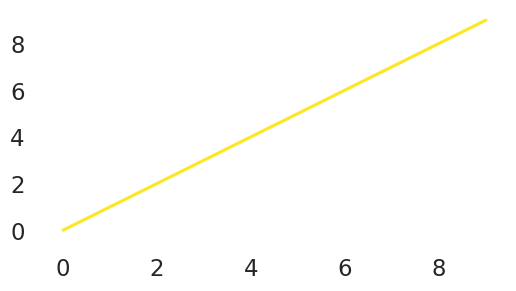

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('pandas1book') 
sns.set_context('talk')
plt.plot(range(10))

<AxesSubplot:xlabel='year'>

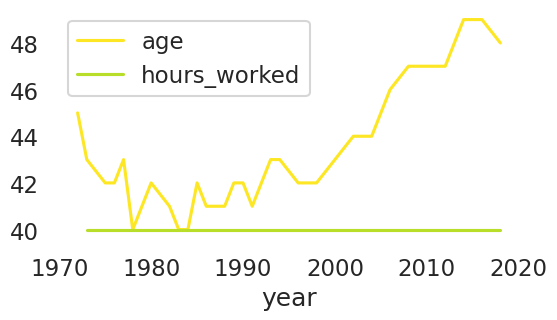

In [65]:
(gss2
   .groupby('year')
   [['age', 'hours_worked']]
   .median()
   .plot()
)

<AxesSubplot:xlabel='year'>

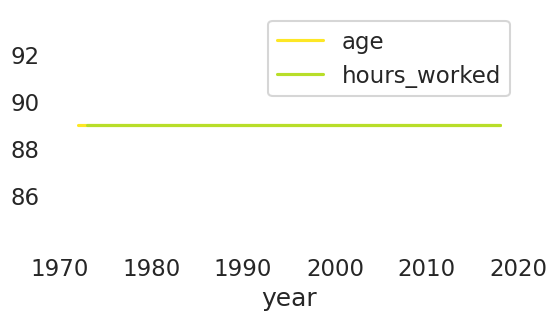

In [68]:
(gss2
   .groupby('year')
   [['age', 'hours_worked']]
   #.mean()
   #.median()
   #.std()
   .max()
   .plot()
)

In [ ]:
# add sex
(gss2
   .groupby(['year', 'sex'])
   [['age', 'hours_worked']]
   .mean()
   #.median()
   #.std()
   #.max()
   #.plot()
)

<AxesSubplot:xlabel='year,sex'>

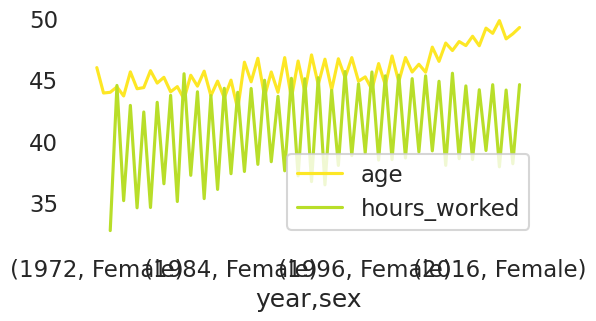

In [71]:
# add sex
(gss2
   .groupby(['year', 'sex'])
   [['age', 'hours_worked']]
   .mean()
   #.median()
   #.std()
   #.max()
   .plot()
)

In [73]:
# unstack
(gss2
   .groupby(['year', 'sex'])
   [['age', 'hours_worked']]
   .mean()
   .unstack()
   #.median()
   #.std()
   #.max()
   #.plot()
)

age            hours_worked           
sex      Female       Male       Female       Male
year                                              
1972  45.987545  43.916771          NaN        NaN
1973  43.974968  44.417973    32.707790  44.534737
1974  43.676807  45.638607    35.146259  42.908276
1975  44.265030  44.359703    34.561562  42.371231
1976  45.739708  44.725636    34.586884  43.160633
1977  45.196407  44.015987    36.521851  43.727459
1978  44.438278  43.420559    35.075520  45.488323
1980  45.365524  44.475819    37.208790  44.019650
1982  45.696545  43.700260    35.313110  43.709553
1983  44.885082  43.521107    36.060467  44.303535
1984  44.964367  42.606365    37.340660  43.976246
1985  46.429253  44.830902    37.522564  44.287170
1986  46.746445  43.636509    38.102093  44.958057
1987  45.631527  43.976715    38.319569  43.649738
1988  46.802147  43.496864    37.577877  45.116329
1989  46.524628  44.013638    37.166283  45.080170
1990  47.022137  44.602650    36.697182  45.163895
1991  46.673122  44.180817    36.435375  44.133484
1993  46.707741  45.165203    38.016426  45.667358
1994  46.800823  44.874321    38.818832  44.664139
1996  45.230625  44.207783    39.044651  45.631687
1998  46.316875  44.566776    38.455215  45.319736
2000  46.936871  44.840000    38.497280  45.371525
2002  46.806156  45.629902    38.625282  45.088966
2004  46.258022  45.613636    39.110600  45.319553
2006  47.655861  46.496738    39.203403  44.876713
2008  47.989872  47.378639    38.021240  45.529781
2010  48.112076  47.779774    38.568108  44.497208
2012  48.540592  47.768360    38.494583  44.183567
2014  49.203449  48.779438    39.233730  44.596256
2016  49.818928  48.329403    37.903980  44.160355
2018  48.740711  49.255482    38.154713  44.599998

In [74]:
(gss2
   .groupby(['year', 'sex'])
   [['age', 'hours_worked']]
   .mean()
   .unstack()
   .age
)

sex      Female       Male
year                      
1972  45.987545  43.916771
1973  43.974968  44.417973
1974  43.676807  45.638607
1975  44.265030  44.359703
1976  45.739708  44.725636
1977  45.196407  44.015987
1978  44.438278  43.420559
1980  45.365524  44.475819
1982  45.696545  43.700260
1983  44.885082  43.521107
1984  44.964367  42.606365
1985  46.429253  44.830902
1986  46.746445  43.636509
1987  45.631527  43.976715
1988  46.802147  43.496864
1989  46.524628  44.013638
1990  47.022137  44.602650
1991  46.673122  44.180817
1993  46.707741  45.165203
1994  46.800823  44.874321
1996  45.230625  44.207783
1998  46.316875  44.566776
2000  46.936871  44.840000
2002  46.806156  45.629902
2004  46.258022  45.613636
2006  47.655861  46.496738
2008  47.989872  47.378639
2010  48.112076  47.779774
2012  48.540592  47.768360
2014  49.203449  48.779438
2016  49.818928  48.329403
2018  48.740711  49.255482

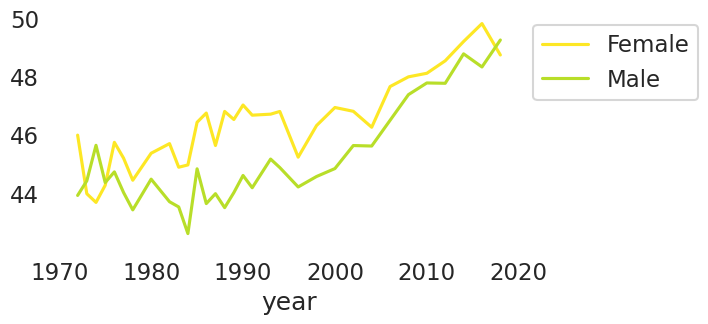

In [75]:
(gss2
   .groupby(['year', 'sex'])
   [['age', 'hours_worked']]
   .mean()
   .unstack()
   .age
   .plot()
   .legend(bbox_to_anchor=(1,1))
)

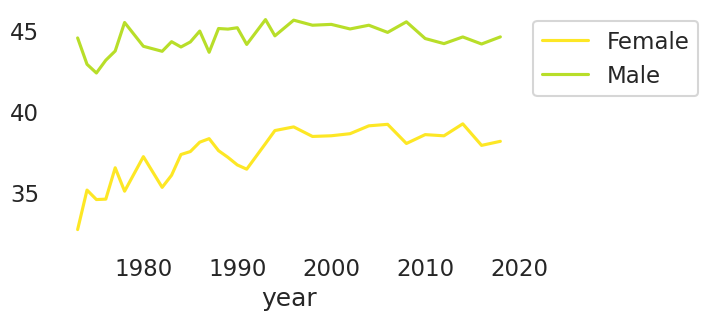

In [76]:
# Let's try looking at hours worked
(gss2
   .groupby(['year', 'sex'])
   [['age', 'hours_worked']]
   .mean()
   .unstack()
   .hours_worked
   .plot()
   .legend(bbox_to_anchor=(1,1))
)

In [77]:
# Multiple aggregates
(gss2
   .groupby(['year', 'sex'])
   [['age', 'hours_worked']]
  .agg(['min', 'max', 'median'])
   
)

age              hours_worked             
              min   max median          min   max median
year sex                                                
1972 Female  18.0  89.0   45.0          NaN   NaN    NaN
     Male    18.0  89.0   44.0          NaN   NaN    NaN
1973 Female  18.0  86.0   42.0          1.0  80.0   37.0
     Male    18.0  89.0   43.0          0.0  89.0   40.0
1974 Female  18.0  89.0   41.0          8.0  89.0   40.0
...           ...   ...    ...          ...   ...    ...
2014 Male    18.0  89.0   50.0          1.0  89.0   40.0
2016 Female  18.0  89.0   50.0          1.0  89.0   40.0
     Male    18.0  89.0   48.0          1.0  89.0   40.0
2018 Female  18.0  89.0   47.5          1.0  89.0   40.0
     Male    18.0  89.0   49.0          1.0  89.0   40.0

[64 rows x 6 columns]

## Summary

* Correct types save space and enable convenient math, string, and date functionality
* Chaining operations will:
   * Make code readable
   * Remove bugs
   * Easier to debug
* Don't mutate (there's no point). Embrace chaining.
* ``.apply`` is slow for math
* Aggregations are powerful. Play with them until they make sense
* Upcoming course https://maven.com/matt-harrison/data-analysis-using-pandas

Follow me on Twitter ``@__mharrison__``

Book giveaway!


In [79]:
import random
random.randrange(1,13)

3